In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from QAOAKit import (
    opt_angles_for_graph,
    get_fixed_angles,
    get_graph_id,
    get_graph_from_id,
    angles_to_qaoa_format,
    beta_to_qaoa_format,
    gamma_to_qaoa_format,
    angles_to_qiskit_format,
    angles_to_qtensor_format,
    get_3_reg_dataset_table,
    get_3_reg_dataset_table_row,
    get_full_qaoa_dataset_table_row,
    get_full_qaoa_dataset_table,
    get_fixed_angle_dataset_table,
    get_fixed_angle_dataset_table_row,
    qaoa_maxcut_energy,
    noisy_qaoa_maxcut_energy,
    angles_from_qiskit_format,

)

In [2]:
# check the QAOAKit dataset
reg3s = get_3_reg_dataset_table()
print(reg3s.columns)
reg3s.dropna(subset=['C_opt'], how='any')
reg3s.head(10)

Index(['G', 'n', 'C_{true opt}', 'C_fixed', 'C_opt', 'beta', 'gamma',
       'all beta (degenerate optima)', 'all gamma (degenerate optima)',
       'theta'],
      dtype='object')


G  n  \
pynauty_cert                                       p_max                    
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1      (0, 1, 2, 3)  4   
                                                   2      (0, 1, 2, 3)  4   
                                                   3      (0, 1, 2, 3)  4   
                                                   4      (0, 1, 2, 3)  4   
                                                   5      (0, 1, 2, 3)  4   
                                                   6      (0, 1, 2, 3)  4   
                                                   7      (0, 1, 2, 3)  4   
                                                   8      (0, 1, 2, 3)  4   
                                                   9      (0, 1, 2, 3)  4   
                                                   10     (0, 1, 2, 3)  4   

                                                          C_{true opt}  \
pynauty_cert                                       p_max                 
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1               4.0   
                                                   2               4.0   
                                                   3               4.0   
                                                   4               4.0   
                                                   5               4.0   
                                                   6               4.0   
                                                   7               4.0   
                                                   8               4.0   
                                                   9               4.0   
                                                   10              4.0   

                                                           C_fixed     C_opt  \
pynauty_cert                                       p_max                       
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1      3.488031  3.697516   
                                                   2      3.443514  4.000000   
                                                   3      3.725746       NaN   
                                                   4      3.799435       NaN   
                                                   5      3.902329       NaN   
                                                   6      3.821207       NaN   
                                                   7      3.856606       NaN   
                                                   8      3.902939       NaN   
                                                   9      3.869821       NaN   
                                                   10     3.909461       NaN   

                                                                                               beta  \
pynauty_cert                                       p_max                                              
b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x00... 1                          [0.41009128896428304]   
                                                   2      [0.28529502533693074, 0.3670557719502767]   
                                                   3                                            NaN   
                                                   4                                            NaN   
                                                   5                                            NaN   
                                                   6                                            NaN   
                                                   7                                            NaN   
                                                   8                                            NaN   
                                                   9                                            NaN   
                                                   10                                           NaN   

                                                         

In [3]:
# ! accumulate all the data frame, already done, comment them
# df_paths = ["2022-05-27_16:13:03_count_optima_p=1,2.p",
#             "2022-05-28_15:32:29_count_optima_fixed_angles_p=3.p",
#             "2022-05-28_16:41:34_count_optima_fixed_angles_p=4-6_nQ=4-10.p",
#             "2022-05-30_00:04:24_count_optima_fixed_angles_p=4-6_nQ=12.p",
#             "2022-05-29_10:37:46_count_optima_fixed_angles_nQ=14_p=4.p",
#             "2022-05-30_00:08:00_count_optima_fixed_angles_p=5-6_nQ=14.p",
#             ]
# df = pd.read_pickle(df_paths[0])
# for path in df_paths[1:]:
#     tmp = pd.read_pickle(path)
#     df = df.append(tmp)

# print(len(df))
# df.to_pickle("count_optima_p=1-6_nQ=4-16.p")

# ! read directly from this data frame
# ! pay attention to the conda env: py39_mitiq
# ! using other env there might be fault
# ! guess this is due to the version of numpy
df = pd.read_pickle("cnt_opt_miti_df/2022-07-10_23:57:40_cnt_opt_fixed_angles.p")
print(len(df))

20


In [4]:
df.head(5)

,row_id,G,pynauty_cert,n_qubits,p,miti_n_opt_list,unmiti_n_opt_list,has_opt
0,31,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[42, 16, 31, 9, 20, 7]","[39, 16, 33, 7, 14, 8]",False
1,41,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[20, 10, 14, 9, 14, 6]","[24, 10, 11, 8, 13, 7]",False
2,51,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",False
3,61,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[22, 6, 6, 7, 17, 3]","[21, 6, 8, 8, 18, 5]",False
4,71,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",False


In [5]:
# 1. take product of n_optima_list
# 2. take mean value of n_optima_list

# def Pi(a):
#     prod = 1.0
#     for i in a:
#         prod *= i
#     return prod

# df["prod_n_optima"] = df.apply(
#     lambda x: Pi(x["n_optima_list"]), axis=1
# )

df["avg_miti_n_opt"] = df.apply(
   lambda x: np.mean(x["miti_n_opt_list"]), axis=1
)

df["avg_unmiti_n_opt"] = df.apply(
   lambda x: np.mean(x["unmiti_n_opt_list"]), axis=1
)

df.head()

,row_id,G,pynauty_cert,n_qubits,p,miti_n_opt_list,unmiti_n_opt_list,has_opt,avg_miti_n_opt,avg_unmiti_n_opt
0,31,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[42, 16, 31, 9, 20, 7]","[39, 16, 33, 7, 14, 8]",False,20.833333,19.500000
1,41,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[20, 10, 14, 9, 14, 6]","[24, 10, 11, 8, 13, 7]",False,12.166667,12.166667
2,51,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",False,1.000000,1.000000
3,61,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[22, 6, 6, 7, 17, 3]","[21, 6, 8, 8, 18, 5]",False,10.166667,11.000000
4,71,"(0, 1, 2, 3, 4, 5, 6, 7)",b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...,8,2,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",False,1.000000,1.000000


In [6]:
# avg = df.groupby('p').agg({'prod_n_optima': 'mean', 'avg_n_optima': 'mean'})
# avg

KeyError: "Column(s) ['avg_n_optima', 'prod_n_optima'] do not exist"

In [7]:
df["p"].value_counts()

1    48
2    48
3    48
4    38
5    38
6    38
Name: p, dtype: int64

In [8]:
df["n_qubits"].value_counts()

10    60
12    60
14    60
8     30
16    30
6     12
4      6
Name: n_qubits, dtype: int64

In [7]:
newdf = df.groupby(by=["n_qubits", "p"]).size()
newdf

n_qubits  p
8         2    5
          3    5
          4    5
          5    5
dtype: int64

In [9]:
# https://blog.51cto.com/u_15069477/4257711
newdf = df.groupby(by=["n_qubits", "p"], as_index=False).agg({'avg_unmiti_n_opt': 'mean', 'avg_miti_n_opt': 'mean'})
newdf

,n_qubits,p,avg_unmiti_n_opt,avg_miti_n_opt
0,8,2,8.933333,9.033333
1,8,3,8.613333,8.680000
2,8,4,9.721429,10.442857
3,8,5,8.240000,9.133333


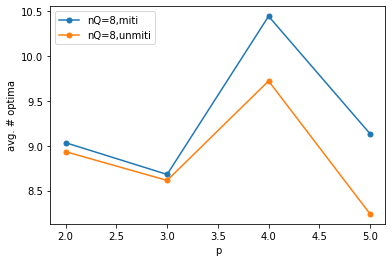

In [12]:
fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for n_qubits in range(8, 9, 2):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["n_qubits"]==n_qubits) & (newdf["p"]>=2)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["p"], tmp["avg_miti_n_opt"], marker="o", markersize=5, label=f"nQ={n_qubits},miti")
    ax.plot(tmp["p"], tmp["avg_unmiti_n_opt"], marker="o", markersize=5, label=f"nQ={n_qubits},unmiti")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("p")
# ax.set_title('')
ax.legend()

# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

0    b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...
1    b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...
2    b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...
3    b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...
4    b'\x00\x00\x00\x00\x00\x00\x00p\x00\x00\x00\x0...
Name: pynauty_cert, dtype: object


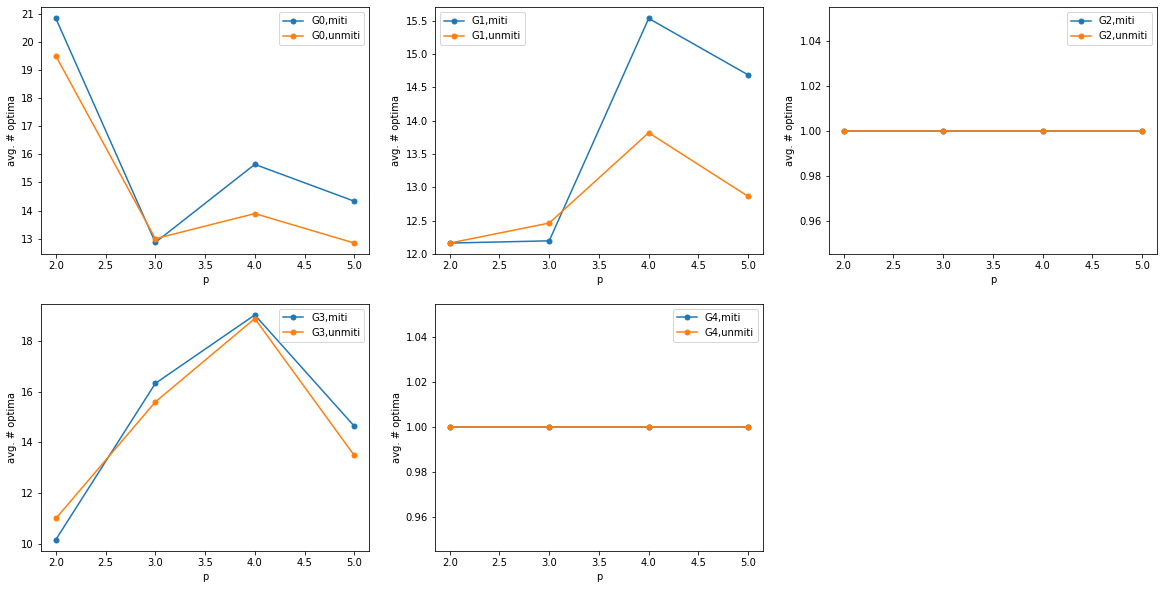

In [29]:
# for different graphs

# newdf = df.groupby(by=["pynauty_cert"], as_index=False).agg({'avg_unmiti_n_opt': 'mean', 'avg_miti_n_opt': 'mean'})
newdf = df
print(newdf['pynauty_cert'].drop_duplicates())
# fig, ax = plt.subplots()
# fig = plt.figure()

fig = plt.figure(figsize=[20, 10])
# for n_qubits in range(4, 17, 2):
# for n_qubits in range(8, 9, 2):
cnt = 0
for cert in newdf['pynauty_cert'].drop_duplicates():
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    # tmp = newdf.loc[(newdf["n_qubits"]==n_qubits) & (newdf["p"]>=2)]
    tmp = newdf.loc[newdf['pynauty_cert']==cert]
    
    plt.subplot(2, 3, cnt+1)
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    plt.plot(tmp["p"], tmp["avg_miti_n_opt"], marker="o", markersize=5, label=f"G{cnt},miti")
    plt.plot(tmp["p"], tmp["avg_unmiti_n_opt"], marker="o", markersize=5, label=f"G{cnt},unmiti")
    cnt += 1

    plt.ylabel("avg. # optima")
    plt.xlabel("p")
    plt.legend()

plt.show()
# fig.close
# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

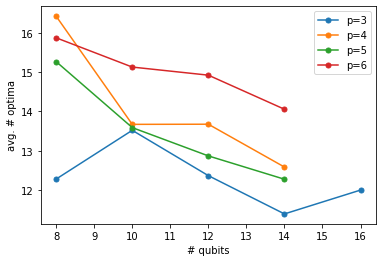

In [11]:
fig, ax = plt.subplots()
# for n_qubits in range(4, 17, 2):
for p in range(3, 7):
    # tmp = newdf[newdf["n_qubits"]==n_qubits]
    tmp = newdf.loc[(newdf["p"]==p) & (newdf["n_qubits"]>=8)]
    
    # ax.plot(tmp["p"], tmp["avg_n_optima"], marker="o", color='purple', markersize=5, label="prod")
    ax.plot(tmp["n_qubits"], tmp["avg_n_optima"], marker="o", markersize=5, label=f"p={p}")

ax.set_ylabel("avg. # optima")
ax.set_xlabel("# qubits")
# ax.set_title('')
ax.legend()

# fig.colorbar(c, ax=ax)
# fig.savefig(f'{figdir}/varIndices={var1_idx},{var2_idx}_nOpt{cnt_opt}.png')
# plt.close(fig)

In [12]:
# count optima for a specific graph
# for a given graph, it will have many p-s
df.groupby(by=["row_id"]).size()

row_id
0       1
1       1
2       1
3       1
4       1
       ..
6291    1
6292    1
6300    1
6301    1
6302    1
Length: 258, dtype: int64

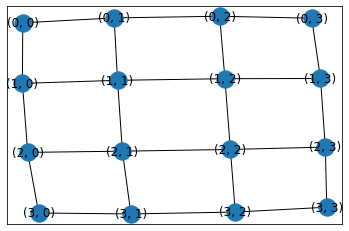

In [45]:
# below are some test for grid graph, ignore
G = nx.grid_2d_graph(4, 4)
len(G)
nx.draw_networkx(G)

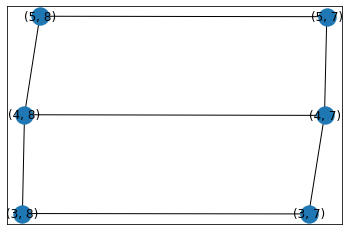

In [44]:
G = nx.grid_graph(dim=(range(7, 9), range(3, 6)))
len(G)
nx.draw_networkx(G)